kaggle link
https://www.kaggle.com/datasets/denkuznetz/traffic-accident-prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2> loading data in </h2>

In [3]:
data = pd.read_csv('dataset_traffic_accident_prediction1.csv')

In [4]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


<h2> Processing data</h2>

working out total null values within each column

In [5]:
for column in data.columns:
    print(f"{column} total null values: {sum(data[column].isnull())}")

Weather total null values: 42
Road_Type total null values: 42
Time_of_Day total null values: 42
Traffic_Density total null values: 42
Speed_Limit total null values: 42
Number_of_Vehicles total null values: 42
Driver_Alcohol total null values: 42
Accident_Severity total null values: 42
Road_Condition total null values: 42
Vehicle_Type total null values: 42
Driver_Age total null values: 42
Driver_Experience total null values: 42
Road_Light_Condition total null values: 42
Accident total null values: 42


removing null values

In [6]:
data = data.dropna()

In [7]:
#converting columns into a integer and not a float
data['Driver_Age'] = data['Driver_Age'].astype(int)
data['Number_of_Vehicles'] = data['Number_of_Vehicles'].astype(int)
data['Driver_Experience'] = data['Driver_Experience'].astype(int)
data['Driver_Alcohol'] = data['Driver_Alcohol'].astype(int)
data['Traffic_Density'] = data['Traffic_Density'].astype(int)
data['Accident'] = data['Accident'].astype(int)

In [8]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,Rainy,Highway,Evening,1,60.0,4,0,Low,Icy,Car,54,52,Artificial Light,0
3,Clear,City Road,Afternoon,2,60.0,3,0,Low,Under Construction,Bus,34,31,Daylight,0
4,Rainy,Highway,Morning,1,195.0,11,0,Low,Dry,Car,62,55,Artificial Light,1
6,Foggy,Highway,Afternoon,0,60.0,4,0,Low,Dry,Truck,27,26,Daylight,1
7,Rainy,City Road,Afternoon,0,60.0,4,0,Low,Dry,Car,29,22,Artificial Light,1


<h2> data visualisation/understanding</h2>

([<matplotlib.patches.Wedge at 0x7cdf88339be0>,
 [Text(1.0999870251692847, 0.005342701491524556, ''),
  Text(1.099910280720051, 0.01404899876641613, ''),
  Text(1.0998037811349517, 0.02077601986096843, ''),
  Text(1.0995833892129108, 0.030271606614916263, ''),
  Text(1.0991773826376137, 0.04253329869555577, ''),
  Text(1.0988016851261022, 0.05133085586699536, ''),
  Text(1.0985394107099762, 0.05666712554010766, ''),
  Text(1.0982400490991486, 0.06219963468300881, ''),
  Text(1.097900623269908, 0.06792806064909887, ''),
  Text(1.0974713347044467, 0.07454307145563857, ''),
  Text(1.096936135557856, 0.0820433696735882, ''),
  Text(1.096252395263667, 0.09072312758427736, ''),
  Text(1.0953920559338683, 0.1005795396538145, ''),
  Text(1.0944728554472587, 0.11013250514323264, ''),
  Text(1.0935025991680163, 0.1193820154495342, ''),
  Text(1.0925923657623473, 0.12744380046843065, ''),
  Text(1.0917683107970866, 0.13432034670620943, ''),
  Text(1.090593649015074, 0.14354613449335882, ''),
  Te

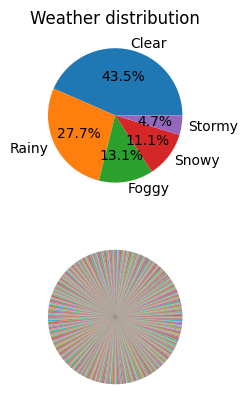

In [32]:
#working out the proportion of each type of condiction

fig,ax = plt.subplots(2)

wordLabels = ["Clear","Rainy","Foggy","Snowy","Stormy"]
ageLabels = np.array([]).astype(int)
totalWordArr = np.array([]).astype(int)
ageArr = np.array([]).astype(int)

for word in wordLabels:
    totalWordArr = np.append(totalWordArr,sum((data['Weather'] == word) == True))
    #print(f"Total amount of rows for {word} {sum((data['Weather'] == word) == True)}")

#creating the labels for the age category
for age in data['Driver_Age']:
    ageArr = np.append(ageArr,age)
    
    if ageLabels.size > 0:
        if np.isin(ageLabels,age) == False:
            ageArr = np.append(ageArr,age)
    else:
        ageLabels = np.append(ageLabels, age)

ax[0].pie(totalWordArr, labels=wordLabels, autopct="%1.1f%%")
ax[0].set_title("Weather distribution")
ax[1].pie(ageArr)

In [26]:
np.size??

Signature:       np.size(a, axis=None)
Call signature:  np.size(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function size at 0x7cdfb40ab2e0>
File:            ~/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py
Source:         
@array_function_dispatch(_size_dispatcher)
def size(a, axis=None):
    """
    Return the number of elements along a given axis.

    Parameters
    ----------
    a : array_like
        Input data.
    axis : int, optional
        Axis along which the elements are counted.  By default, give
        the total number of elements.

    Returns
    -------
    element_count : int
        Number of elements along the specified axis.

    See Also
    --------
    shape : dimensions of array
    ndarray.shape : dimensions of array
    ndarray.size : number of elements in array

    Examples
    --------
    >>> import numpy as np
    >>> a = np.array([[1,2,3],[4,5,6]])
    >>> np.size(a)
    6
    >>> np.size(a,1)
    3
  

In [10]:
print(data["Driver_Age"].describe)

<bound method NDFrame.describe of 2      54
3      34
4      62
6      27
7      29
       ..
830    56
835    23
836    52
838    25
839    29
Name: Driver_Age, Length: 405, dtype: int64>
